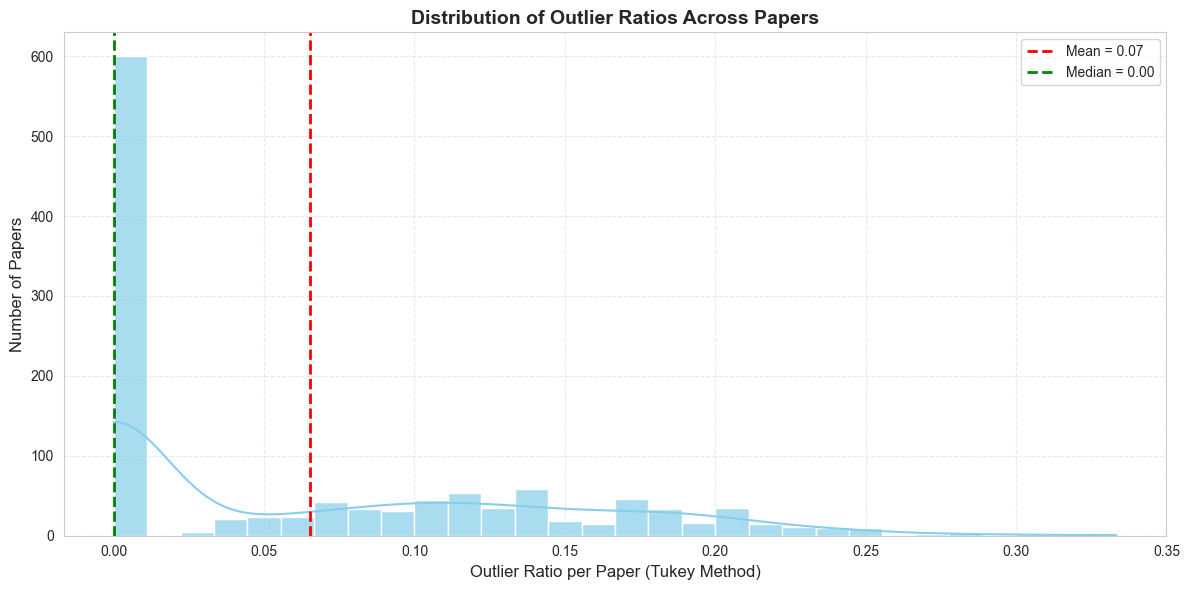

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 📁 设置你的数据所在文件夹
folder_path = 'E:/document/research/myresearch/突破性创新/code/zuizhong/result/result'  # 修改为你的路径

# 📌 初始化结果
results = []

# 📦 遍历所有 CSV 文件
for filename in os.listdir(folder_path):
    if filename.endswith('_similarity_distance.csv'):
        paper_id = filename.replace('_similarity_distance.csv', '')
        file_path = os.path.join(folder_path, filename)

        try:
            df = pd.read_csv(file_path)
            if 'similarity' not in df.columns:
                print(f"⚠️ 文件 {filename} 缺少 similarity 列")
                continue

            # 🎯 转换：distance = (1 - similarity)/2
            df['novelty'] = (1 - df['similarity']) / 2

            # 🧪 Tukey 方法检测异常值
            q1 = df['novelty'].quantile(0.25)
            q3 = df['novelty'].quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr

            df['is_outlier'] = ~df['novelty'].between(lower, upper)

            # 📊 计算异常比例
            outlier_ratio = df['is_outlier'].mean()
            results.append({'paper_id': paper_id, 'outlier_ratio': outlier_ratio})

        except Exception as e:
            print(f"❌ 处理文件 {filename} 出错：{e}")

# 📌 整合结果为 DataFrame
outlier_df = pd.DataFrame(results)

# ✅ 保存结果（可选）
outlier_df.to_csv('outlier_ratios_tukey.csv', index=False)

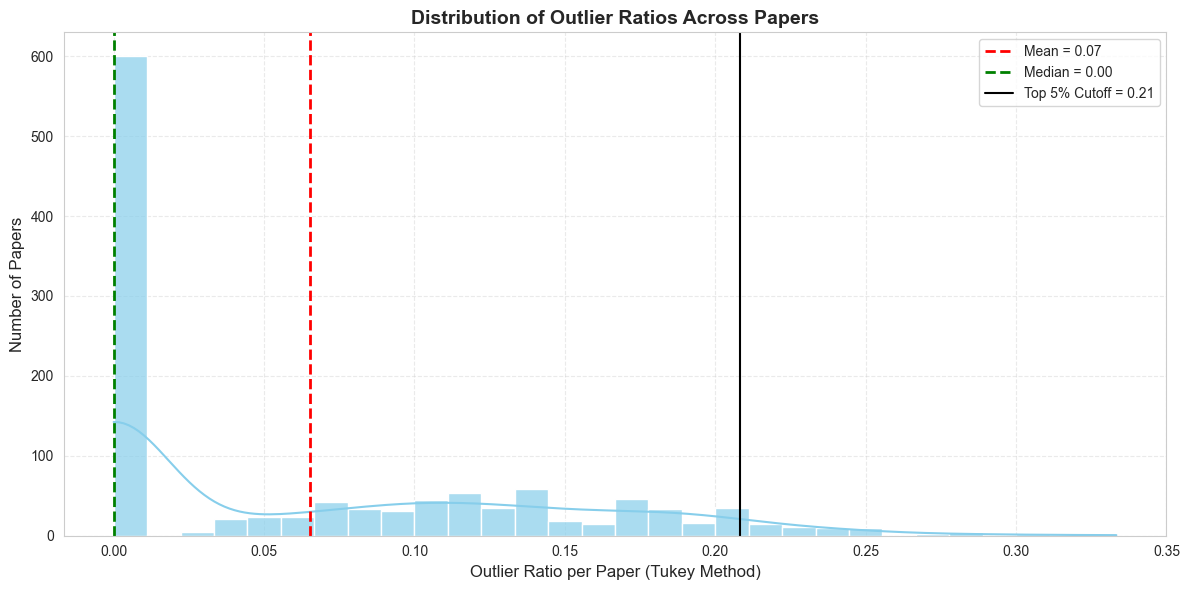

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 假设 outlier_df 已包含列：paper_id, outlier_ratio
ratios = outlier_df['outlier_ratio']
top_5pct = ratios.quantile(0.95)

plt.figure(figsize=(12, 6))
sns.histplot(ratios, bins=30, kde=True, color='skyblue', edgecolor='white', alpha=0.7)
plt.axvline(ratios.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean = {ratios.mean():.2f}')
plt.axvline(ratios.median(), color='green', linestyle='--', linewidth=2, label=f'Median = {ratios.median():.2f}')
plt.axvline(top_5pct, color='black', linestyle='-', linewidth=1.5, label=f'Top 5% Cutoff = {top_5pct:.2f}')

plt.xlabel('Outlier Ratio per Paper (Tukey Method)', fontsize=12)
plt.ylabel('Number of Papers', fontsize=12)
plt.title('Distribution of Outlier Ratios Across Papers', fontsize=14, weight='bold')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()


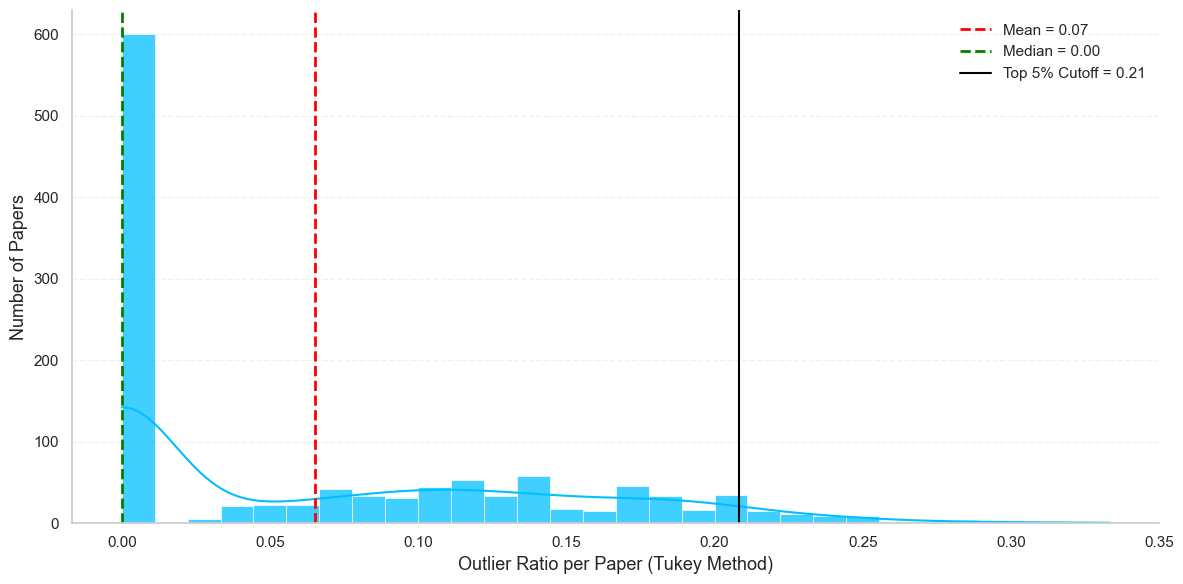

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 设置全局 Seaborn 风格
sns.set(style="whitegrid")  # 你也可以用 white、ticks、darkgrid
plt.rcParams['axes.facecolor'] = 'white'  # 去除灰色背景

# 2. 数据准备
ratios = outlier_df['outlier_ratio']
mean_val = ratios.mean()
median_val = ratios.median()
top_5pct = ratios.quantile(0.95)

# 3. 画图
plt.figure(figsize=(12, 6))
sns.histplot(ratios, bins=30, kde=True, color='deepskyblue', edgecolor='white', alpha=0.75, linewidth=0.5)

# 添加参考线
plt.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean = {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median = {median_val:.2f}')
plt.axvline(top_5pct, color='black', linestyle='-', linewidth=1.5, label=f'Top 5% Cutoff = {top_5pct:.2f}')

# 4. 美化细节
plt.xlabel('Outlier Ratio per Paper (Tukey Method)', fontsize=13)
plt.ylabel('Number of Papers', fontsize=13)
#plt.title('Distribution of Outlier Ratios Across Papers', fontsize=15, weight='bold')

plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# 去除上、右边框
sns.despine()

# 控制网格线样式（只显示 y 网格线，淡化）
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.grid(axis='x', visible=False)

plt.legend(frameon=False, fontsize=11)
plt.tight_layout()
plt.savefig("outlier.png", dpi=300, bbox_inches='tight')
plt.show()